# The birth of the strong components, draft 3.

In this draft, we use the computer algebra system `sympy` to show how to deal with tedious expressions.

## Preliminaries

In [1]:
import sympy as sp
sp.init_printing()

We need several symbolic variables, including (for both critical and supercritical phases)

* `n` for the number of vertices
* `mu` for the scaled number of edges
* `lambda` for the density constant

also special constants related to Airy functions

* `a_1` for the dominant root of `Ai`
* `b_1` for the dominant root of `Ai'`
* `Ai_*` for derivative of Airy function
* `Ai` for Airy

In [15]:
n = sp.Symbol('n')
mu = sp.Symbol('mu')
lam = sp.Symbol('lambda')

a1 = sp.Symbol('a_{1}')
a1prime = sp.Symbol('b_{1}')
Ai = sp.Symbol('Ai(b_{1})')
Ai_prime = sp.Symbol('Ai_{*}(a_{1})')

In [11]:
[n, mu, lam]

In [16]:
[a1, a1prime, Ai, Ai_prime]

With this notation at hand, we recall the arithmetic expressions appearing when we compute the asymptotic probabilities for the families of multidigraphs and simple digraphs.

#### Lemma 5.1

$e^{-wn^2/2} n! \dfrac{1}{2 \pi i} \displaystyle\oint_{|z| =\rho}
e^{U(zw)/w}(1 - T(zw))^{1/2-r} \dfrac{dz}{z^{n+1}} \sim (1 - \lambda)^{1 - r}$

using the saddle point method, we obtain an intermediate expression

$\dfrac{1}{2 \pi i} \displaystyle\oint_{|z| =\rho} (\cdots)
\sim
\dfrac{1}{\sqrt{2 \pi \partial_z^2 f(\rho, w)}}
\dfrac{e^{f(\rho,w)}}{\rho}
(1 - \lambda)^k$

The value of $f(\rho, w)$ is given by

$f(\rho, w) = \dfrac{T(zw)}{zw} - \dfrac{n}{z}$.

Using $z = e^{-\lambda}n$, $w = \lambda/n$, $T(\rho w) = \lambda$ and $U = T - T^2/2$, we obtain

$f(\rho, w) = n + \dfrac{\lambda n}{2} - n \log n$ as follows:

In [46]:
T = lam
z = sp.exp(-lam) * n
w = lam / n
U = T - T**2/2

In [53]:
f = U/w - n * sp.log(z)
sp.expand(sp.expand_log(f, force=True))

Here, we can define the function $T(x)$ and incorporate recursively its derivatives

In [77]:
class T(sp.Function):
    """
    Define the generating function of trees and incorporate its derivative in a recursive manner

    `T' = T/(z(1-T))`
    """
    def fdiff(self, argindex=1):
        if argindex == 1:
            z = self.args[0]
            return T(z) / z / (1 - T(z))
        else:
            raise ArgumentIndexError(self, argindex)                    

In [78]:
z = sp.Symbol('z')
[
    T(z),
    T(z).diff(z),
    T(z).diff(z,z)
]

The first and the second derivative of $f(z, w)$ at $z = \rho$ is given by

In [79]:
z,w=sp.symbols('z w')

In [80]:
U = T(z*w) - T(z*w)**2/2
U

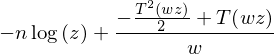

In [81]:
f = U/w - n * sp.log(z)
f

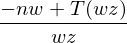

In [82]:
f.diff(z).simplify()

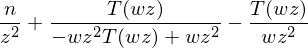

In [83]:
f.diff(z).simplify().diff(z).expand()

Also, the value of the second derivative at the point `rho` can be deduced

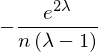

In [90]:
#T = lam
#z = sp.exp(-lam) * n
#w = lam / n
#U = T - T**2/2

f_second = f.diff(z).simplify().diff(z).expand()
f_second.subs(T(z*w), lam).subs(z, sp.exp(-lam)*n).subs(w, lam/n).simplify()

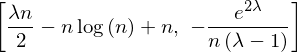

In [91]:
f_of_rho = n + lam * n/2 - n * sp.log(n)
f_zz = f_second.subs(T(z*w), lam).subs(z, sp.exp(-lam)*n).subs(w, lam/n).simplify()
[f_of_rho, f_zz]

By putting together with the asymptotic approximation of $n!$ by Stirling's formula, we obtain

$ e^{-wn^2/2} n! 
\dfrac{1}{\sqrt{2 \pi \partial_z^2 f(\rho, w)}}
\dfrac{e^{f(\rho,w)}}{\rho}
(1 - \lambda)^k
\sim $

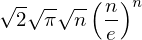

In [55]:
def fact(n):
    return sp.sqrt(2 * sp.pi * n) * (n/sp.E)**n
fact(n)

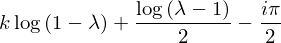

In [103]:
k = sp.Symbol('k')
w = lam / n
expr = (
    sp.exp(-w * n**2/2) * fact(n)
    /
    sp.sqrt(2 * sp.pi * f_zz)
    *
    sp.exp(f_of_rho)
    / (sp.exp(-lam) * n)
    * (1 - lam)**k
)
sp.expand_log(sp.log(expr), force=True).simplify()

We obtain, therefore, asymptotically $(1 - \lambda)^{k + 1/2}$.
This simplifies to $(1 - \lambda)^{1 - r}$.

In [104]:
r = sp.Symbol('r')
(1 - lam)**(k + sp.Rational(1,2)).subs(k, sp.Rational(1,2)-r)

#### Lemma 6.1

Similar computations appear in Lemma 6.1.
There, we have

$
\left(
1 - \lambda / n
\right)^{n(n-1)/2}
\dfrac{n!}{2 \pi i}
\displaystyle\oint_{|z| = \rho}
e^{U(zw)/w + U(zw)/2}
(1 - T(zw))^{1/2 - r}
\dfrac{dz}{z^{n+1}}
$

In [109]:
z, w = sp.symbols('z w')

In [111]:
f = U/w + U/2 - n * sp.log(z)

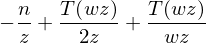

In [114]:
f.diff(z).simplify().expand()

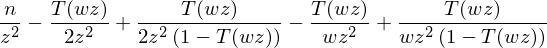

In [120]:
f.diff(z).simplify().expand().diff(z)

Now, the solution to the saddle point equation is more subtle. However, we are able to solve equations of type $T(x) = y$ quite easily, using the property $x = T(x) e^{-T(x)}$.

In [121]:
f_z = f.diff(z).simplify().expand()

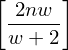

In [123]:
sp.solve(f_z, T(z*w))

In [137]:
T_of_rho_w = sp.solve(f_z, T(z*w))[0]

In [124]:
def T_inverse(x):
    return x * sp.exp(-x)

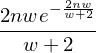

In [126]:
rho_times_w = T_inverse(sp.solve(f_z, T(z*w))[0])
rho_times_w

Then, depending on the value `w` we choose, there are two solutions.

If $w = \dfrac{p}{1 - 2p}$ or $w = \dfrac{p}{1 - p}$, then by substituting $p = \lambda/n$, we obtain

$w = \lambda / (n - 2\lambda)$ or $w = \lambda / (n - \lambda)$.

In [139]:
w_1 = lam / (n - 2*lam)
w_2 = lam / (n - lam)

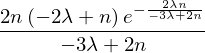

In [140]:
rho_1 = (rho_times_w / w).subs(w, w_1)
rho_1.simplify()

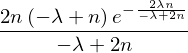

In [141]:
rho_2 = (rho_times_w / w).subs(w, w_2)
rho_2.simplify()

Now we want to know the asymptotics of the second derivative at $z = \rho$

In [134]:
f_zz = f.diff(z).simplify().expand().diff(z)

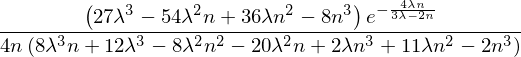

In [144]:
(
    f_zz
    .subs(T(z*w), T_of_rho_w)
    .subs(z, rho_1)
    .subs(w, w_1)
    .simplify()
)

As the expression looks a bit too messy, we want the series with respect to variable `n`

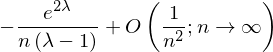

In [168]:
f_zz_rho_1 = sp.series(
    f_zz
    .subs(T(z*w), T_of_rho_w)
    .subs(z, rho_1)
    .subs(w, w_1)
    .simplify(), n, sp.oo, n=2)
f_zz_rho_1

The same holds for the second case as well

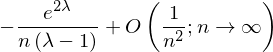

In [169]:
f_zz_rho_2 = sp.series(
    f_zz
    .subs(T(z*w), T_of_rho_w)
    .subs(z, rho_2)
    .subs(w, w_2)
    .simplify(), n, sp.oo, n=2)
f_zz_rho_2

We also want to look at the value of the function `f` at the saddle point using the same tool

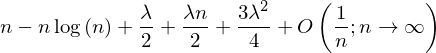

In [170]:
f_rho_1 = sp.expand_log(sp.series(
    f
    .subs(T(w*z), T_of_rho_w)
    .subs(z, rho_1)
    .subs(w, w_1)
    , n, sp.oo, n=1).simplify(),
              force=True)
f_rho_1

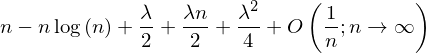

In [171]:
f_rho_2 = sp.expand_log(sp.series(
    f
    .subs(T(w*z), T_of_rho_w)
    .subs(z, rho_2)
    .subs(w, w_2)
    , n, sp.oo, n=1).simplify(),
              force=True)
f_rho_2

By combining with the initial coefficient in front of integral we obtain the final expressions

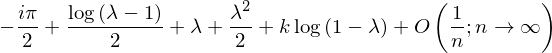

In [179]:
sp.expand_log(
    sp.series(
        sp.expand_log(sp.log(
            (1 - lam/n)**(n*(n-1)/2)
            * fact(n)
            / sp.sqrt(2 * sp.pi * f_zz_rho_1)
            * sp.exp(f_rho_1) / rho_1
            * (1 - lam)**k
        ),force=True),
    n, sp.oo, n=1),
force=True)

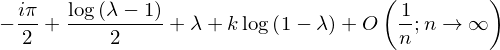

In [180]:
sp.expand_log(
    sp.series(
        sp.expand_log(sp.log(
            (1 - lam/n)**(n*(n-1)/2)
            * fact(n)
            / sp.sqrt(2 * sp.pi * f_zz_rho_2)
            * sp.exp(f_rho_2) / rho_1
            * (1 - lam)**k
        ),force=True),
    n, sp.oo, n=1),
force=True)